In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
from mplEasyAnimate import animation
from numba import njit, jit
from nbodyIntegrator import int_n_model

In [2]:
def load_C_output(filename):
    with open(filename, 'rb') as f:
        line_one = f.readline()
        remainder = f.read()
    line_one = line_one.decode("utf-8")
    line_one = [int(x.rstrip()) for x in line_one.split(',')]
    bodies = line_one[0]
    timesteps=line_one[1]
    state = np.frombuffer(remainder, dtype=np.float64)
    state = state.reshape(timesteps, bodies, 7)
    
    return state

In [3]:
def load_and_animate_from_disk(filename, animationName, animate=False):
    state = load_C_output(filename)
    if animate:
        anim = animation(animationName, fps=30)
        for i, timestep in tqdm(enumerate(state), total=len(state)):
            if i%5 == 0:
                fig = plt.figure()
                plt.plot(timestep[:, 0], timestep[:, 1], 'o')
                anim.add_frame(fig)
                plt.close(fig)
        anim.close()
    return state

In [4]:
def load_integrate_and_animate_state(filename, animationName, animate=False):
    state = load_C_output(filename)
    initial_state = state[0]
    ts, ys = int_n_model(initial_state, 0.01, 10)
    if animate:
        anim = animation(animationName, fps=30)
        for i, timestep in tqdm(enumerate(ys), total=len(ys)):
            if i%5 == 0:
                fig = plt.figure()
                plt.plot(timestep[:, 0], timestep[:, 1], 'o')
                anim.add_frame(fig)
                plt.close(fig)
        anim.close()
    return ts, ys

In [13]:
ts, ys = load_integrate_and_animate_state('OutputData', 'PythonIntegrate.mp4')

100%|██████████| 1000/1000 [00:11<00:00, 89.08it/s]


In [14]:
cys = load_and_animate_from_disk('OutputData', 'Test.mp4', animate=True)

100%|██████████| 1000/1000 [00:25<00:00, 39.84it/s]


In [15]:
ys.shape

(1001, 100, 7)

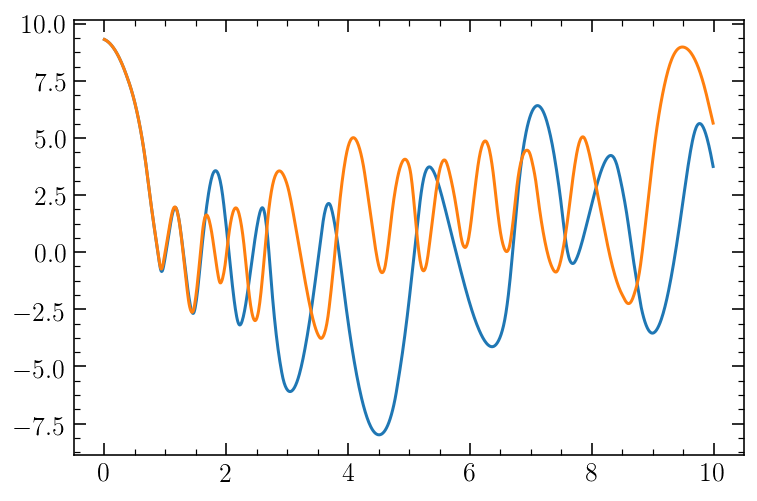

In [19]:
pid = 99
plt.plot(ts, ys[:-1, pid, 0])
plt.plot(ts, cys[:, pid, 0])